In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../utils/')
import FigureConfig as FC

In [2]:
alpha = torch.linspace(0,1,51)

In [3]:
result = torch.load('result.matrix')
result.shape

torch.Size([13, 10, 51, 8])

In [4]:
result_AL = torch.load('result_AL.matrix')
result_AL.shape

torch.Size([10, 4, 13, 12])

In [5]:
target = torch.load('target.matrix')
target.shape

torch.Size([4, 13])

In [6]:
pareto = torch.load('pareto.curves')
pareto.shape

torch.Size([13, 2, 1000])

# Pareto

In [7]:
acc_points_ft   = result[:,:,:,6]
power_points_ft = result[:,:,:,7] / 1e3
acc_points_ft.shape

torch.Size([13, 10, 51])

In [8]:
re_acc_pt         = result_AL[:,:,:,2]
re_power_pt       = result_AL[:,:,:,3] / 1e3
re_acc_ft         = result_AL[:,:,:,6]
re_power_ft       = result_AL[:,:,:,7] / 1e3
re_acc_ft_reset   = result_AL[:,:,:,10]
re_power_ft_reset = result_AL[:,:,:,11] / 1e3

In [9]:
lims = [[0,1000 / 1e3],
        [0,1200 / 1e3],
        [0,2000 / 1e3],
        [0,2500 / 1e3],
        [0,1500 / 1e3],
        [0,1500 / 1e3],
        [0,1000 / 1e3],
        [0,1500 / 1e3],
        [0,3000 / 1e3],
        [0,1400 / 1e3],
        [0,1700 / 1e3],
        [0,1400 / 1e3],
        [0,1200 / 1e3]]

In [10]:
colors = [FC.Blue, FC.Orange, FC.Red, FC.Black]

0 0 tensor(4)
0 1 tensor(2)
0 2 tensor(1)
0 3 tensor(0)


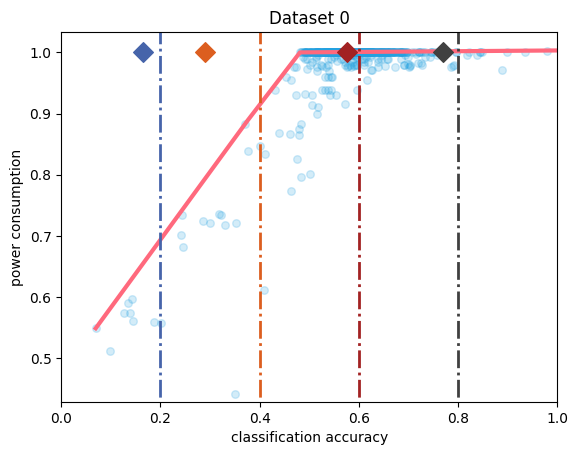

1 0 tensor(4)
1 1 tensor(0)
1 2 tensor(9)
1 3 tensor(4)


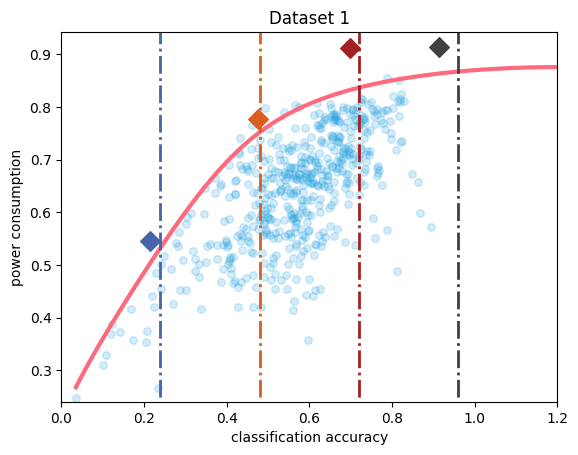

2 0 tensor(3)
2 1 tensor(9)
2 2 tensor(6)
2 3 tensor(0)


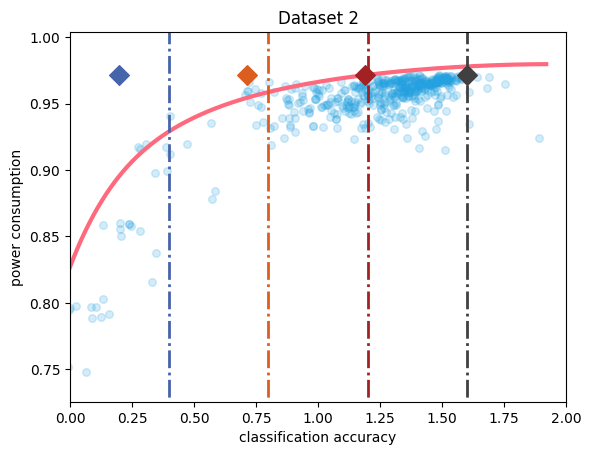

3 0 tensor(5)
3 1 tensor(7)
3 2 tensor(8)
3 3 tensor(4)


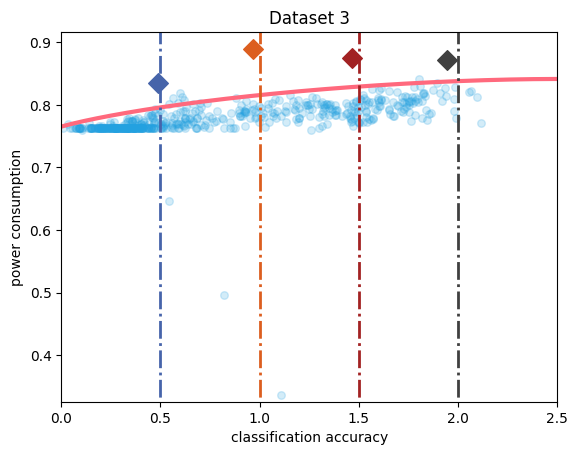

4 0 tensor(2)
4 1 tensor(3)
4 2 tensor(4)
4 3 tensor(2)


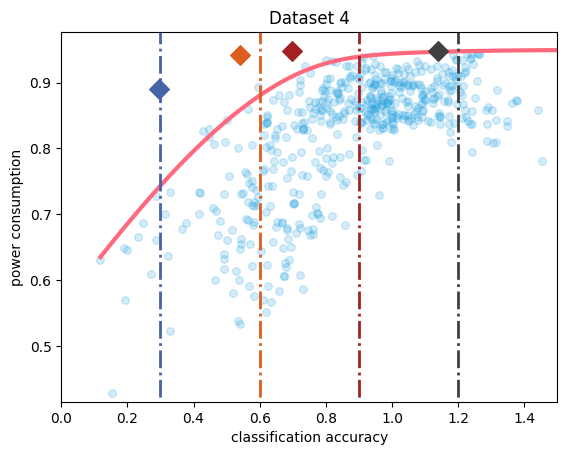

5 0 tensor(3)
5 1 tensor(9)
5 2 tensor(4)
5 3 tensor(4)


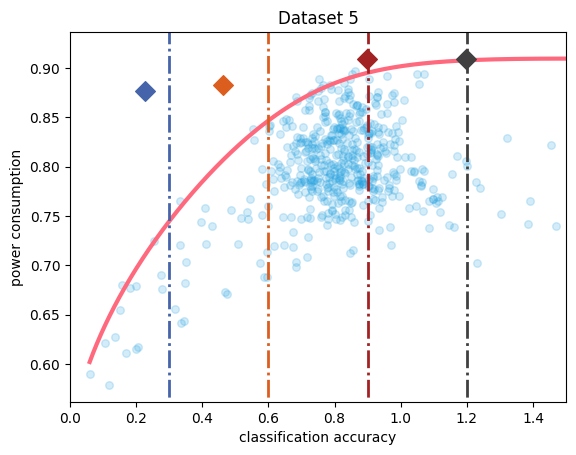

6 0 tensor(0)
6 1 tensor(8)
6 2 tensor(5)
6 3 tensor(4)


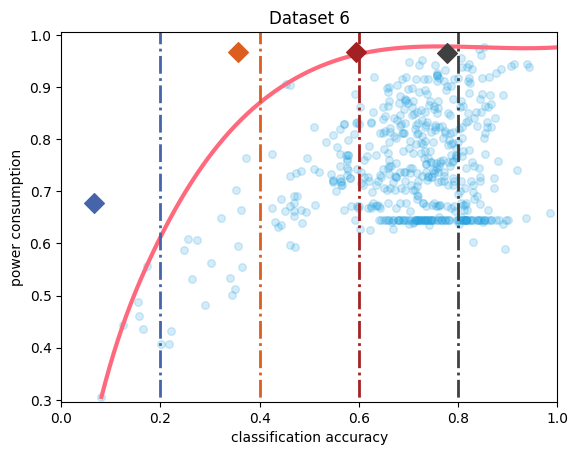

7 0 tensor(1)
7 1 tensor(5)
7 2 tensor(6)
7 3 tensor(4)


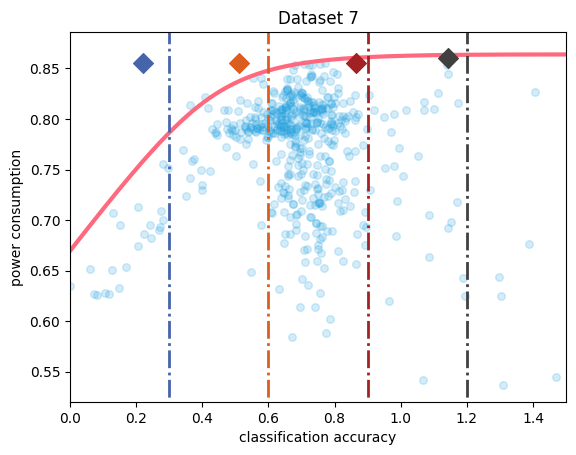

8 0 tensor(2)
8 1 tensor(3)
8 2 tensor(2)
8 3 tensor(6)


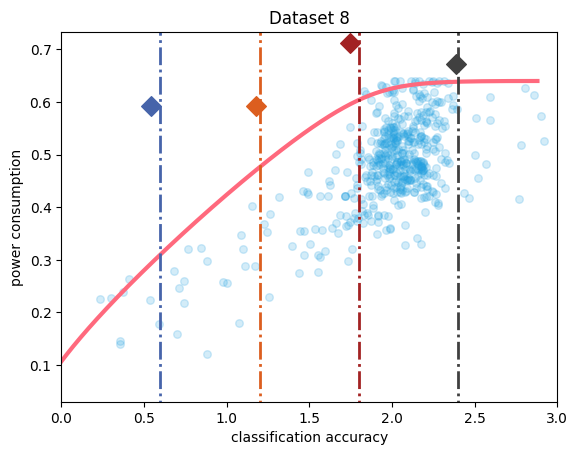

9 0 tensor(4)
9 1 tensor(6)
9 2 tensor(2)
9 3 tensor(4)


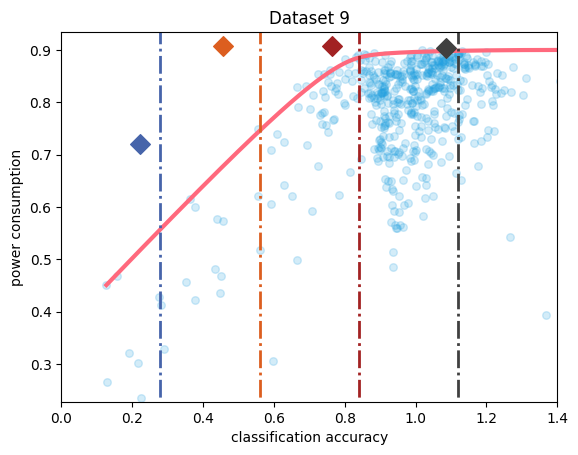

10 0 tensor(2)
10 1 tensor(2)
10 2 tensor(6)
10 3 tensor(7)


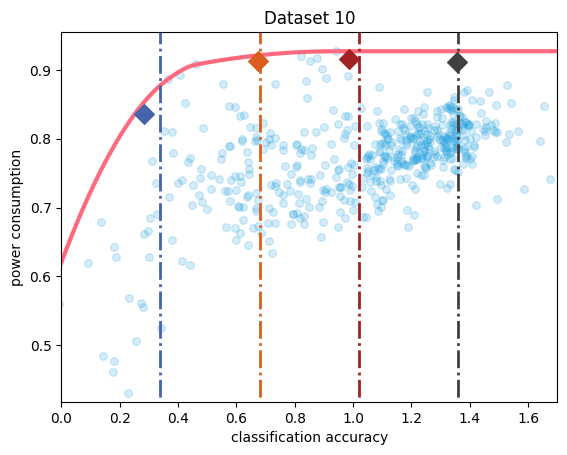

11 0 tensor(8)
11 1 tensor(2)
11 2 tensor(8)
11 3 tensor(9)


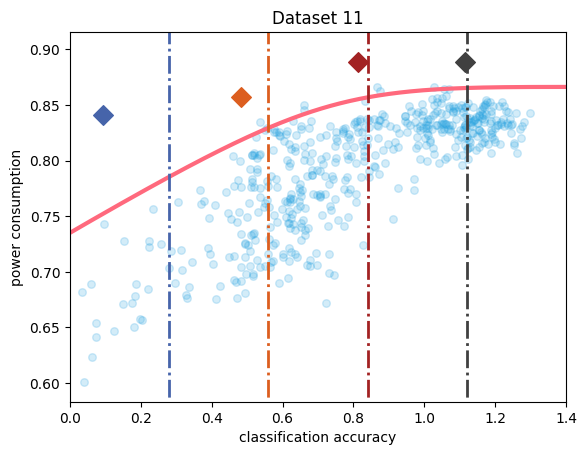

12 0 tensor(0)
12 1 tensor(0)
12 2 tensor(0)
12 3 tensor(8)


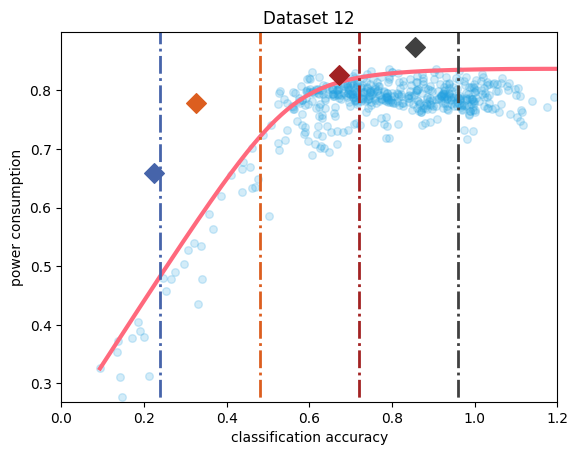

In [11]:
baseline = torch.zeros([13,4])
baseline[0,0] = 0.695
baseline[0,1] = 0.918
baseline[0,2] = 1.
baseline[0,3] = 1.

for ds in range(13):
    data = torch.stack([power_points_ft[ds].flatten(), acc_points_ft[ds].flatten()], dim=1).numpy()
    if ds == 0:
        x = data[:,0]
        y = data[:,1]
        invalid = (x<0.48) & (y>0.98)
        valid = ~invalid
        data = data[valid]
    if ds == 2:
        x = data[:,0]
        y = data[:,1]
        invalid = (x<0.7) & (y>0.95)
        valid = ~invalid
        data = data[valid]

    ymin = acc_points_ft[ds].flatten().min() * 0.97
    ymax = acc_points_ft[ds].flatten().max()
    
    pareto_x, pareto_y = pareto[ds,0,:], pareto[ds,1,:]
    
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], color=FC.Cyan, s=30, alpha=0.2)
    plt.plot(pareto_x, pareto_y, color=FC.Pink, lw=3)
    
    plt.xlim(lims[ds])

    power = target[:,ds] / 1000
    for i in range(4):
        idx = torch.argmax(result_AL[:,i,ds,2].flatten())
        print(ds,i,idx)
        plt.plot([power[i],power[i]], [0,1.5], '-.', color=colors[i], lw=2)
        plt.scatter(result_AL[idx,i,ds,3]/1e3,result_AL[idx,i,ds,2], marker='D', s=100, zorder=20, color=colors[i])
        ymax = max(ymax, result_AL[idx,i,ds,2])
    
    ymax = ymax * 1.03
    plt.ylim([ymin, ymax])
    
    plt.title(f'Dataset {ds}')
    plt.xlabel('classification accuracy')
    plt.ylabel('power consumption')
    
    # plt.xticks([])
    # plt.yticks([])
    # plt.savefig(f"../figures/{ds:02d}.pdf", format='pdf', bbox_inches='tight', transparent=True)
    plt.show()